In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15

In [45]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [46]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


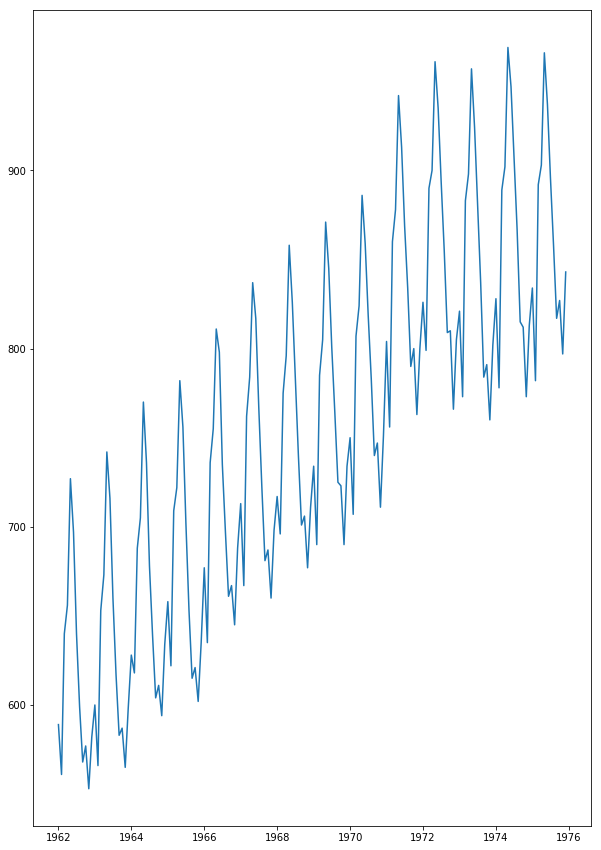

In [47]:
plt.plot(milk.milk)

In [48]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221297,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [49]:
print milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name=u'month', length=168)


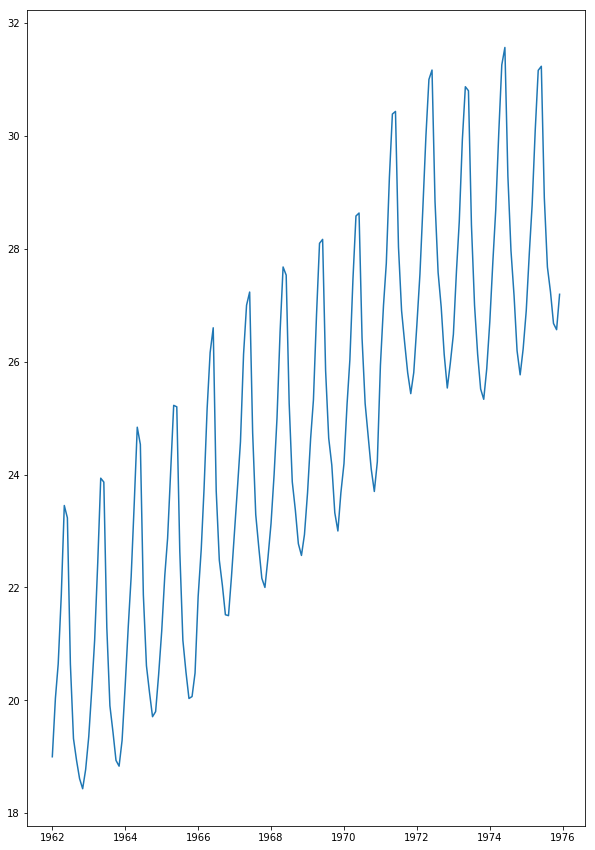

In [50]:
plt.plot(milk.milk / milk.index.days_in_month)

In [51]:
(milk.milk / milk.index.days_in_month).sum()

4166.326661899464

(-1.1798216373266066, 0.6822151513081428, 12, 155, {'5%': -2.880374082105334, '1%': -3.4732590518613002, '10%': -2.5768120811654525}, -1.5708067458066353)


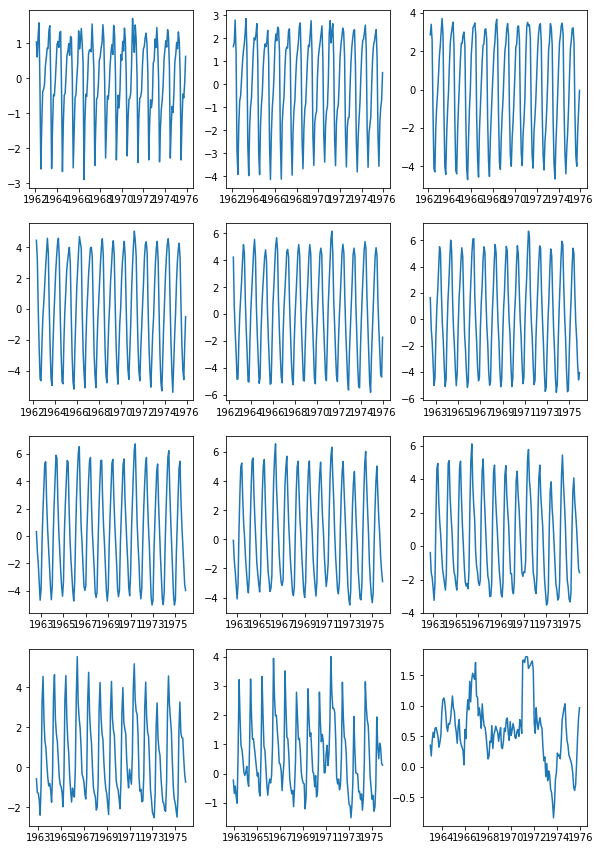

['i:1 p=0.064300546541744', 'i:2 p=0.06401458411356123', 'i:3 p=0.06418479772095302', 'i:4 p=0.060722280541301944', 'i:5 p=0.004458265151341806', 'i:6 p=0.06214870493901064', 'i:7 p=0.008229626696011598', 'i:8 p=0.0014696989903011219', 'i:9 p=0.0002829151858631033', 'i:10 p=0.040532998075946694', 'i:11 p=0.0011228344511987486', 'i:12 p=0.22127672658830333']


In [52]:
milk['daily'] = milk.milk / milk.index.days_in_month
print_arr = []

print sm.tsa.stattools.adfuller(milk.daily)
for i in xrange(1, 13):
    col_name = 'daily_diff' + str(i)
    milk[col_name] = milk.daily - milk.daily.shift(i)
    plt.subplot(4, 3, i)
    plt.plot(milk[col_name])
    print_arr.append("i:" + str(i) + " p=" + str(sm.tsa.stattools.adfuller(milk[col_name].values[i:])[1]))
plt.show()
print print_arr

In [59]:
milk['daily_diff13'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
print sm.tsa.stattools.adfuller(milk.daily_diff13.values[13:])

(-5.48132633479693, 2.2808455518036924e-06, 11, 143, {'5%': -2.8819726324025625, '1%': -3.4769274060112707, '10%': -2.577665408088415}, -20.90513750989237)


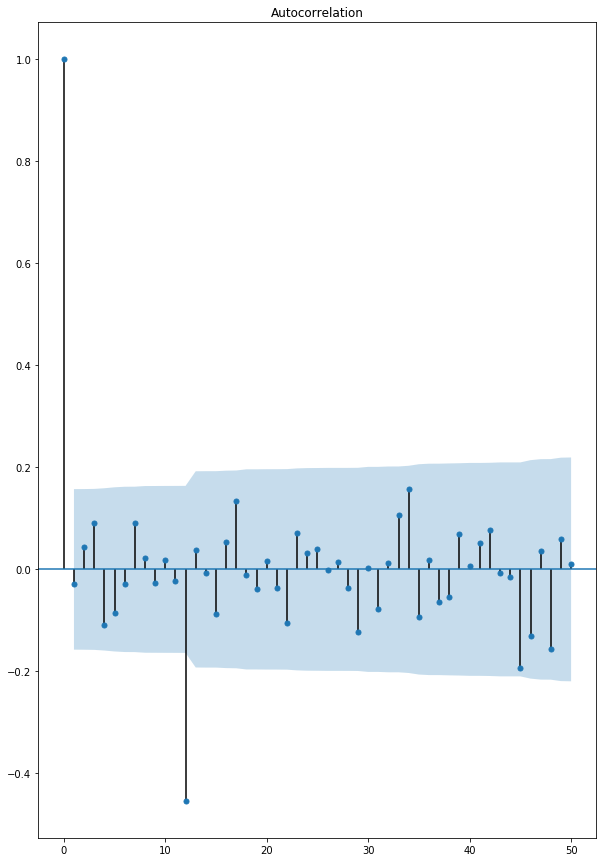

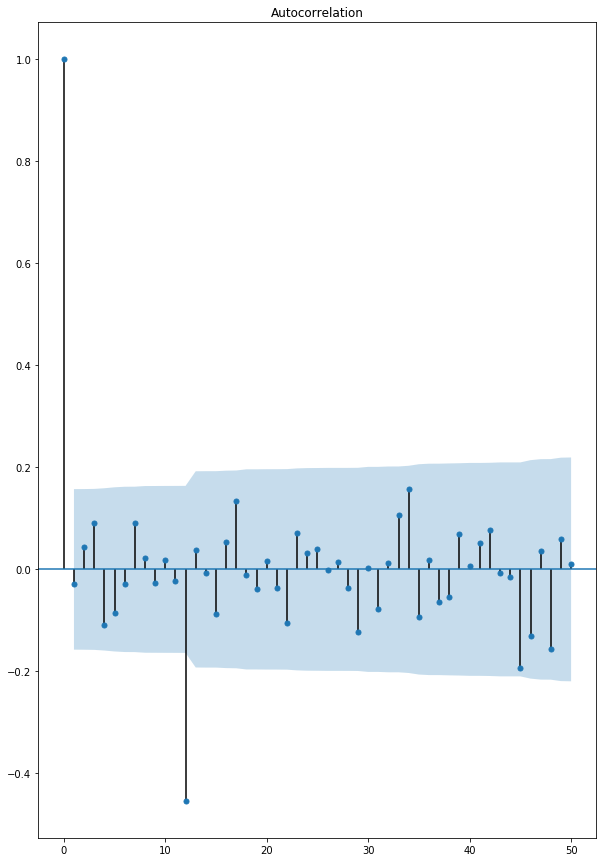

In [56]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff13.values[13:].squeeze(), lags=50)

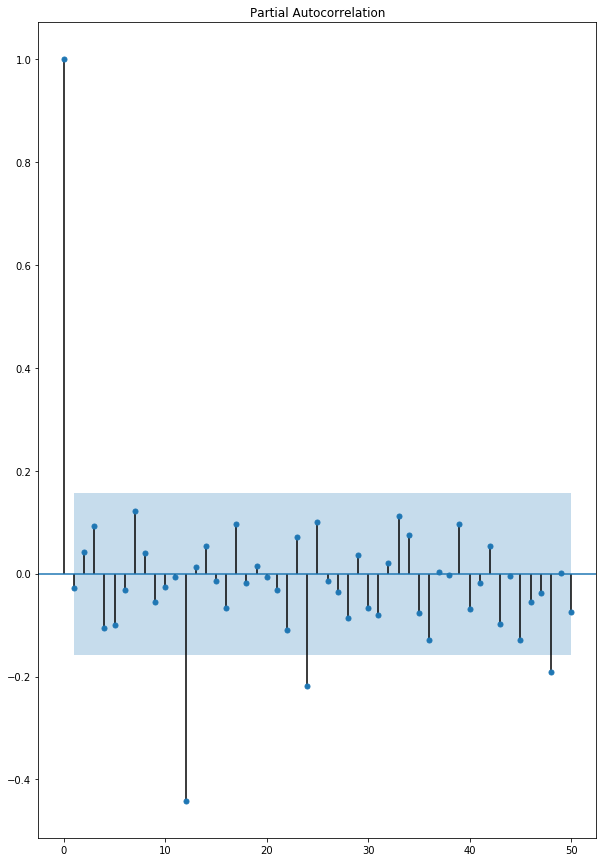

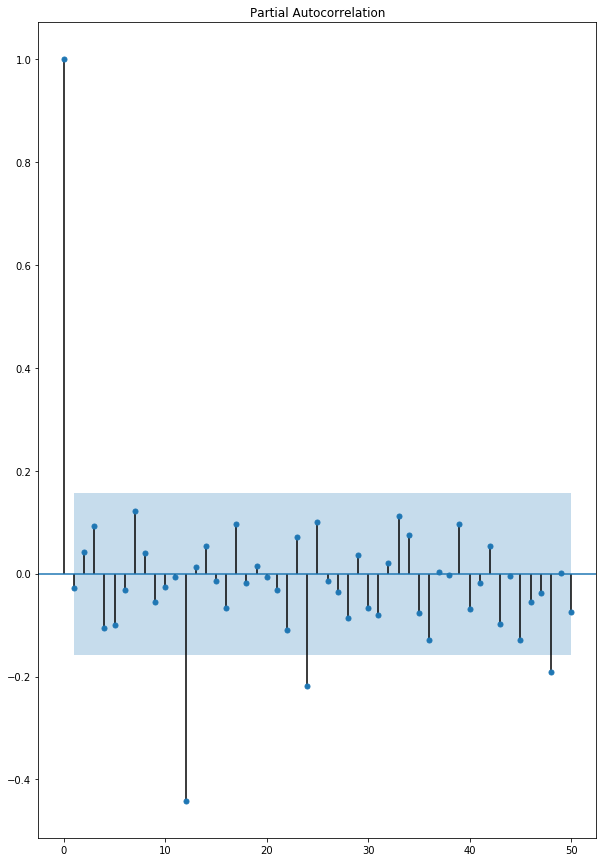

In [57]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff13.values[13:].squeeze(), lags=50)